In [172]:
%pip install imbalanced-learn

     -------------------------------------- 199.3/199.3 KB 4.0 MB/s eta 0:00:00



You should consider upgrading via the 'c:\Users\012883631\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

Create pandas dataframe by getting csv file

In [4]:
df_2015_aux = pd.read_csv('./data/2015.csv')
df_2015_aux.shape

(441456, 330)

In [5]:
df_2015 = df_2015_aux.copy()

In [6]:
df_2015 = df_2015[["DIABETE3", "BPHIGH4", "_RFCHOL", "_BMI5", "_SMOKER3", "CVDSTRK3", "_MICHD", "EXERANY2", "_FRTLT1", "_VEGLT1", "HLTHPLN1", "MEDCOST", "GENHLTH", "MENTHLTH", "PHYSHLTH", "DIFFWALK", "SEX", "_AGEG5YR", "EDUCA", "INCOME2", "FRUITJU1"]]
df_2015.dropna(inplace=True)
df_2015.shape

(328597, 21)

In [7]:
# Filter only relevant information
def filter_by_column(column_name, df, min_value, max_value):
    mask = (df[column_name] >= min_value) & (df[column_name] <= max_value)
    print("Shape after filter on ", column_name, ": ", df[mask].shape)
    return df[mask]

In [8]:
df_2015 = filter_by_column("DIABETE3", df_2015, 1, 4)
df_2015 = filter_by_column("BPHIGH4", df_2015, 1, 3)
df_2015 = filter_by_column("_RFCHOL", df_2015, 1, 2)
df_2015 = filter_by_column("_BMI5", df_2015, 1, 9999)
df_2015 = filter_by_column("_SMOKER3", df_2015, 1, 4)
df_2015 = filter_by_column("CVDSTRK3", df_2015, 1, 2)
df_2015 = filter_by_column("_MICHD", df_2015, 1, 2)
df_2015 = filter_by_column("EXERANY2", df_2015, 1, 2)
df_2015 = filter_by_column("_FRTLT1", df_2015, 1, 2)
df_2015 = filter_by_column("_VEGLT1", df_2015, 1, 2)
df_2015 = filter_by_column("HLTHPLN1", df_2015, 1, 2)
df_2015 = filter_by_column("MEDCOST", df_2015, 1, 2)
df_2015 = filter_by_column("GENHLTH", df_2015, 1, 5)

df_2015.loc[df_2015['MENTHLTH'] == 88, 'MENTHLTH'] = 0 # 88 means 0 days with mental health problems in one month
df_2015 = filter_by_column("MENTHLTH", df_2015, 0, 30)

df_2015.loc[df_2015['PHYSHLTH'] == 88, 'PHYSHLTH'] = 0 # 88 means 0 days with physical health problems in one month
df_2015 = filter_by_column("PHYSHLTH", df_2015, 0, 30)

df_2015 = filter_by_column("DIFFWALK", df_2015, 1, 2)
df_2015 = filter_by_column("SEX", df_2015, 1, 2) 
df_2015 = filter_by_column("_AGEG5YR", df_2015, 1, 13)
df_2015 = filter_by_column("EDUCA", df_2015, 1, 6)
df_2015 = filter_by_column("INCOME2", df_2015, 1, 8)

mask = (df_2015['FRUITJU1'] == 555) | ((df_2015['FRUITJU1'] >= 101) & (df_2015['FRUITJU1'] <= 399))
df_2015 = df_2015[mask]
print("Shape after filter on FRUITJU1: ", df_2015.shape)


Shape after filter on  DIABETE3 :  (328247, 21)
Shape after filter on  BPHIGH4 :  (324084, 21)
Shape after filter on  _RFCHOL :  (321585, 21)
Shape after filter on  _BMI5 :  (321585, 21)
Shape after filter on  _SMOKER3 :  (319488, 21)
Shape after filter on  CVDSTRK3 :  (318784, 21)
Shape after filter on  _MICHD :  (318784, 21)
Shape after filter on  EXERANY2 :  (317761, 21)
Shape after filter on  _FRTLT1 :  (309807, 21)
Shape after filter on  _VEGLT1 :  (301912, 21)
Shape after filter on  HLTHPLN1 :  (301373, 21)
Shape after filter on  MEDCOST :  (300905, 21)
Shape after filter on  GENHLTH :  (300371, 21)
Shape after filter on  MENTHLTH :  (297115, 21)
Shape after filter on  PHYSHLTH :  (293345, 21)
Shape after filter on  DIFFWALK :  (292545, 21)
Shape after filter on  SEX :  (292545, 21)
Shape after filter on  _AGEG5YR :  (291033, 21)
Shape after filter on  EDUCA :  (290681, 21)
Shape after filter on  INCOME2 :  (255286, 21)
Shape after filter on FRUITJU1:  (255286, 21)


In [9]:
df_2013_aux = pd.read_csv('./data/2013.csv')
df_2013_aux.shape

(491773, 336)

In [10]:
df_2013 = df_2013_aux.copy()

In [11]:
df_2013 = df_2013[["DIABETE3", "BPHIGH4", "_RFCHOL", "_BMI5", "_SMOKER3", "CVDSTRK3", "CVDINFR4", "CVDCRHD4", "EXERANY2", "_FRTLT1", "_VEGLT1", "HLTHPLN1", "MEDCOST", "GENHLTH", "MENTHLTH", "PHYSHLTH", "DIFFWALK", "SEX", "_AGEG5YR", "EDUCA", "INCOME2", "FRUITJU1"]]
df_2013.dropna(inplace=True)
df_2013.shape

(380291, 22)

In [12]:
df_2013 = filter_by_column("DIABETE3", df_2013, 1, 4)
df_2013 = filter_by_column("BPHIGH4", df_2013, 1, 3)
df_2013 = filter_by_column("_RFCHOL", df_2013, 1, 2)
df_2013 = filter_by_column("_BMI5", df_2013, 1, 9999)
df_2013 = filter_by_column("_SMOKER3", df_2013, 1, 4)
df_2013 = filter_by_column("CVDSTRK3", df_2013, 1, 2)
df_2013 = filter_by_column("CVDINFR4", df_2013, 1, 2)
df_2013 = filter_by_column("CVDCRHD4", df_2013, 1, 2)
df_2013 = filter_by_column("EXERANY2", df_2013, 1, 2)
df_2013 = filter_by_column("_FRTLT1", df_2013, 1, 2)
df_2013 = filter_by_column("_VEGLT1", df_2013, 1, 2)
df_2013 = filter_by_column("HLTHPLN1", df_2013, 1, 2)
df_2013 = filter_by_column("MEDCOST", df_2013, 1, 2)
df_2013 = filter_by_column("GENHLTH", df_2013, 1, 5)

df_2013.loc[df_2013['MENTHLTH'] == 88, 'MENTHLTH'] = 0 # 88 means 0 days with mental health problems in one month
df_2013 = filter_by_column("MENTHLTH", df_2013, 0, 30)

df_2013.loc[df_2013['PHYSHLTH'] == 88, 'PHYSHLTH'] = 0 # 88 means 0 days with physical health problems in one month
df_2013 = filter_by_column("PHYSHLTH", df_2013, 0, 30)

df_2013 = filter_by_column("DIFFWALK", df_2013, 1, 2)
df_2013 = filter_by_column("SEX", df_2013, 1, 2) 
df_2013 = filter_by_column("_AGEG5YR", df_2013, 1, 13)
df_2013 = filter_by_column("EDUCA", df_2013, 1, 6)
df_2013 = filter_by_column("INCOME2", df_2013, 1, 8)

mask = (df_2013['FRUITJU1'] == 555) | ((df_2013['FRUITJU1'] >= 101) & (df_2013['FRUITJU1'] <= 399))
df_2013 = df_2013[mask]
print("Shape after filter on FRUITJU1: ", df_2013.shape)

Shape after filter on  DIABETE3 :  (379870, 22)
Shape after filter on  BPHIGH4 :  (374910, 22)
Shape after filter on  _RFCHOL :  (372052, 22)
Shape after filter on  _BMI5 :  (372052, 22)
Shape after filter on  _SMOKER3 :  (369774, 22)
Shape after filter on  CVDSTRK3 :  (368867, 22)
Shape after filter on  CVDINFR4 :  (367352, 22)
Shape after filter on  CVDCRHD4 :  (364399, 22)
Shape after filter on  EXERANY2 :  (363410, 22)
Shape after filter on  _FRTLT1 :  (354501, 22)
Shape after filter on  _VEGLT1 :  (345369, 22)
Shape after filter on  HLTHPLN1 :  (344728, 22)
Shape after filter on  MEDCOST :  (344225, 22)
Shape after filter on  GENHLTH :  (343211, 22)
Shape after filter on  MENTHLTH :  (339189, 22)
Shape after filter on  PHYSHLTH :  (334913, 22)
Shape after filter on  DIFFWALK :  (334199, 22)
Shape after filter on  SEX :  (334199, 22)
Shape after filter on  _AGEG5YR :  (332570, 22)
Shape after filter on  EDUCA :  (332255, 22)
Shape after filter on  INCOME2 :  (297652, 22)
Shape afte

In [13]:
# Create _MICHD (Heart Attack or Coronary Disease) using information of Heart Attack and Coronary Disease of 2013 dataset
df_2013.loc[(df_2013['CVDINFR4'] == 1) | (df_2013['CVDCRHD4'] == 1), "_MICHD"] = 1
df_2013.loc[(df_2013['CVDINFR4'] == 2) & (df_2013['CVDCRHD4'] == 2), "_MICHD"] = 2

In [14]:
df_2013.drop(columns=['CVDINFR4', 'CVDCRHD4'], inplace=True)

Join 2013 and 2015 datasets

In [15]:
print("Dataframe 2015 shape: ", df_2015.shape)
print("Dataframe 2013 shape: ", df_2013.shape)
df_aux = pd.concat([df_2013, df_2015])
print("Dataframe's shape after merge: ", df_aux.shape)

Dataframe 2015 shape:  (255286, 21)
Dataframe 2013 shape:  (297652, 21)
Dataframe's shape after merge:  (552938, 21)


In [16]:
df = df_aux.copy()

Merge values into three classes (0 - No Diabetes  1 - Pre diabetes  2 - Diabetes)

In [16]:
df.loc[(df['DIABETE3'] == 1) | (df['DIABETE3'] == 2), "DIABETE3"] = 2
df.loc[(df['DIABETE3'] == 3), "DIABETE3"] = 0
df.loc[(df['DIABETE3'] == 4), "DIABETE3"] = 1

In order to vizualize data distribuition, we applied TSNE algorithm to reduce dataset to only 2 dimentions and then plot the results

c:\Users\012883631\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\012883631\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(552938, 2)


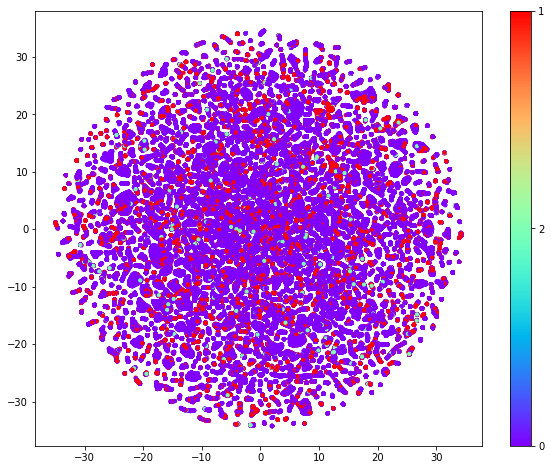

In [60]:
X_data = df.drop(["DIABETE3"], axis=1)
data_2D = TSNE(random_state=2176332).fit_transform(X_data)

np.save('2D_TSNE_data.npy', data_2D)

data_2D = np.load('2D_TSNE_data.npy')

print(data_2D.shape)
plt.figure(figsize=(10, 8))
plt.scatter(data_2D[:,0], data_2D[:,1], s=5, c=df['DIABETE3'], cmap='rainbow')

cbar = plt.colorbar()
cbar.set_ticks(df['DIABETE3'].unique())
cbar.set_ticklabels([0, 1, 2])

Points for each class are well distributed, majoritary data from class 0 - No Diabetes and minority data from class 2 - Pre Diabetes. Let's measure this distribuition:

462645
9738
80555


<AxesSubplot:title={'center':'Distribuição das classes'}>

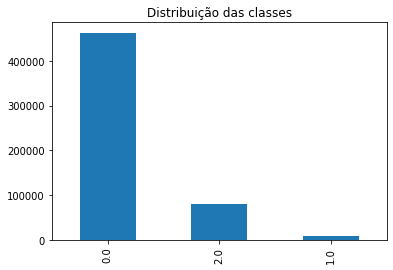

In [17]:
print(df[df["DIABETE3"] == 0].shape[0])
print(df[df["DIABETE3"] == 1].shape[0])
print(df[df["DIABETE3"] == 2].shape[0])
df['DIABETE3'].value_counts().plot(kind = 'bar', title = 'Distribuição das classes')

As expected, our dataset is very unbalanced. Then, to avoid bias due to this imbalance, we will balance this data properly. First, let's undersample both majority classes.

<AxesSubplot:title={'center':'Distribuição das classes'}>

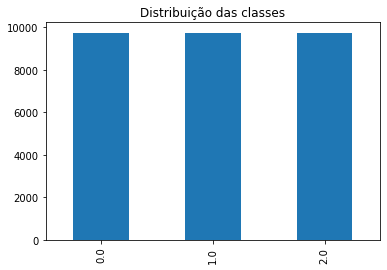

In [18]:
from imblearn.under_sampling import NearMiss

#UNDERSAMPLING CLASS = 0
undersample = NearMiss(version=3, n_neighbors_ver3=5)

df_class_2 = df[df["DIABETE3"] == 2]
df_class_01 = df[df["DIABETE3"] != 2]

x_class_01 = df_class_01.drop(["DIABETE3"],axis=1)
y_class_01 = df_class_01["DIABETE3"]

x_class_01, y_class_01 = undersample.fit_resample(x_class_01, y_class_01)

df_class_01 = x_class_01.assign(DIABETE3 = y_class_01)

df = pd.concat([df_class_2, df_class_01])

#UNDERSAMPLING CLASS = 2
undersample = NearMiss(version=3, n_neighbors_ver3=5)

df_class_0 = df[df["DIABETE3"] == 0]
df_class_12 = df[df["DIABETE3"] != 0]

x_class_12 = df_class_12.drop(["DIABETE3"],axis=1)
y_class_12 = df_class_12["DIABETE3"]

x_class_12, y_class_12 = undersample.fit_resample(x_class_12, y_class_12)

df_class_12 = x_class_12.assign(DIABETE3 = y_class_12)

df = pd.concat([df_class_0, df_class_12])

df["DIABETE3"].value_counts().plot(kind = 'bar', title = 'Distribuição das classes')

Now, let's build a model to predict those three classes. First, we split our data in train and test samples:

In [19]:
x_data = df.drop(["DIABETE3"],axis=1)
y_data = df["DIABETE3"]

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=x_data.columns)

X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)

Then, we create a neural network to train and predict diabetes

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(60, activation="relu", input_shape=(len(x_data.columns),)))
model.add(Dense(60, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                1260      
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dense_2 (Dense)             (None, 3)                 183       
                                                                 
Total params: 5,103
Trainable params: 5,103
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
731/731 [==============================] - 7s 6ms/step - loss: 0.9381 - accuracy: 0.5608 - val_loss: 0.9108 - val_accuracy: 0.5793
Epoch 2/5
731/731 [==============================] - 3s 4ms/step - loss: 0.8982 - accuracy: 0.5874 - val_loss: 0.8942 - val_accuracy: 0.5838
Epoch 3/5
731/731 [=================

To visualize better the results, let's create the classification report table with predicted values:

In [21]:
y_pred = model.predict(X_test)

183/183 [==============================] - 1s 4ms/step


In [22]:
predicted_categories = np.argmax(y_pred, axis = 1)
print(classification_report(y_test, predicted_categories, zero_division=0))

print("Class 0 predictions: ", np.count_nonzero(predicted_categories == 0))
print("Class 1 predictions: ", np.count_nonzero(predicted_categories == 1))
print("Class 2 predictions: ", np.count_nonzero(predicted_categories == 2))

              precision    recall  f1-score   support

         0.0       0.60      0.49      0.54      1991
         1.0       0.78      0.58      0.66      1964
         2.0       0.48      0.71      0.57      1888

    accuracy                           0.59      5843
   macro avg       0.62      0.59      0.59      5843
weighted avg       0.62      0.59      0.59      5843

Class 0 predictions:  1612
Class 1 predictions:  1457
Class 2 predictions:  2774


Now, let's try getting more data. By oversampling class 1 and undersampling class 2, in order to match class 0 size

In [23]:
# getting df original data
df = df_aux.copy()
df.loc[(df['DIABETE3'] == 1) | (df['DIABETE3'] == 2), "DIABETE3"] = 2
df.loc[(df['DIABETE3'] == 3), "DIABETE3"] = 0
df.loc[(df['DIABETE3'] == 4), "DIABETE3"] = 1

<AxesSubplot:title={'center':'Distribuição das classes'}>

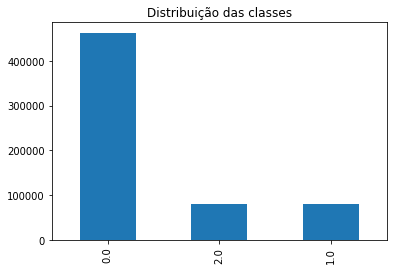

In [24]:
from imblearn.over_sampling import SMOTE

#OVERSAMPLING CLASS = 1
sm = SMOTE(random_state=15)

df_class_0 = df[df["DIABETE3"] == 0]
df_class_12 = df[df["DIABETE3"] != 0]

x_class_12 = df_class_12.drop(["DIABETE3"],axis=1)
y_class_12 = df_class_12["DIABETE3"]

x_class_12, y_class_12 = sm.fit_resample(x_class_12, y_class_12)

df_class_12 = x_class_12.assign(DIABETE3 = y_class_12)

df = pd.concat([df_class_0, df_class_12])

df["DIABETE3"].value_counts().plot(kind = 'bar', title = 'Distribuição das classes')

<AxesSubplot:title={'center':'Distribuição das classes'}>

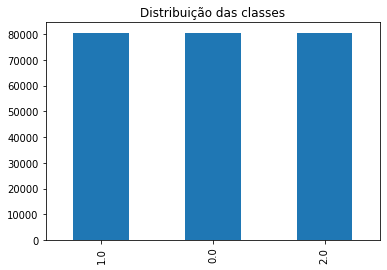

In [25]:
from imblearn.under_sampling import NearMiss

#UNDERSAMPLING CLASS = 0
undersample = NearMiss(version=3, n_neighbors_ver3=5)

df_class_1 = df[df["DIABETE3"] == 1]
df_class_02 = df[df["DIABETE3"] != 1]

x_class_02 = df_class_02.drop(["DIABETE3"],axis=1)
y_class_02 = df_class_02["DIABETE3"]

x_class_02, y_class_02 = undersample.fit_resample(x_class_02, y_class_02)

df_class_02 = x_class_02.assign(DIABETE3 = y_class_02)

df = pd.concat([df_class_1, df_class_02])

df["DIABETE3"].value_counts().plot(kind = 'bar', title = 'Distribuição das classes')

Now, let's visualize data distribution after resampling algorithms. The same TSNE is applied and plotted

In [26]:
X_data = df.drop(["DIABETE3"], axis=1)
data_2D_resized = TSNE(random_state=2176332).fit_transform(X_data)

np.save('2D_TSNE_data_resized_3.npy', data_2D_resized)

c:\Users\012883631\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\012883631\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(241665, 2)


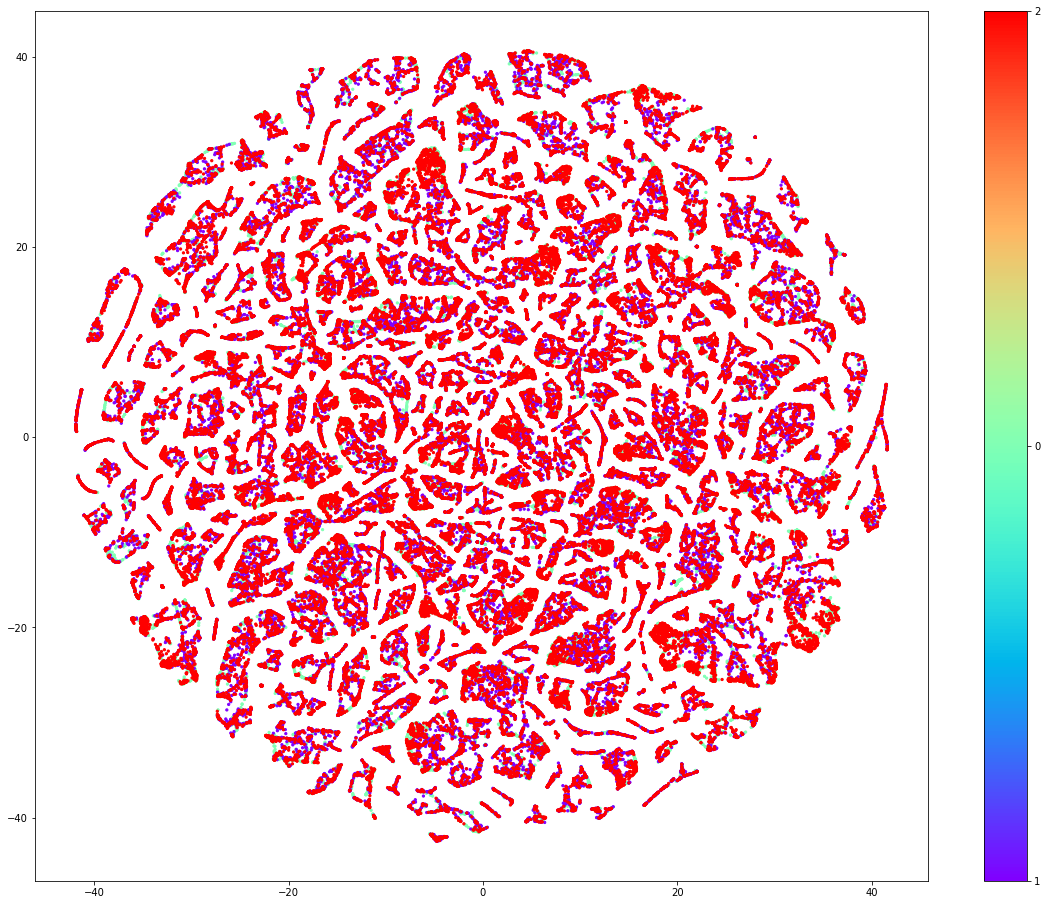

In [82]:
data_2D_resized = np.load('2D_TSNE_data_resized_3.npy')

print(data_2D_resized.shape)
f = plt.figure(figsize=(20, 16))
plt.scatter(data_2D_resized[:,0], data_2D_resized[:,1], s=5, c=df['DIABETE3'], cmap='rainbow')

cbar = plt.colorbar()
cbar.set_ticks(df['DIABETE3'].unique())
cbar.set_ticklabels([0, 1, 2])

After resizing, the data maintained a good distribution without discrepancies compared to the initial one.

Now, let's build a model to predict those three classes. First, we split our data in train and test samples:

In [27]:
x_data = df.drop(["DIABETE3"],axis=1)
y_data = df["DIABETE3"]

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=x_data.columns)

X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)

Then, we create a neural network to train and predict diabetes

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [29]:
model = Sequential()
model.add(Dense(60, activation="relu", input_shape=(len(x_data.columns),)))
model.add(Dense(60, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 60)                1260      
                                                                 
 dense_4 (Dense)             (None, 60)                3660      
                                                                 
 dense_5 (Dense)             (None, 3)                 183       
                                                                 
Total params: 5,103
Trainable params: 5,103
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
6042/6042 [==============================] - 31s 5ms/step - loss: 0.7903 - accuracy: 0.6380 - val_loss: 0.6639 - val_accuracy: 0.7060
Epoch 2/5
6042/6042 [==============================] - 32s 5ms/step - loss: 0.6492 - accuracy: 0.7139 - val_loss: 0.6239 - val_accuracy: 0.7230
Epoch 3/5
6042/6042 [=======

To visualize better the results, let's create the classification report table with predicted values:

In [30]:
y_pred = model.predict(X_test)

1511/1511 [==============================] - 4s 3ms/step


In [31]:
predicted_categories = np.argmax(y_pred, axis = 1)
print(classification_report(y_test, predicted_categories, zero_division=0))

print("Class 0 predictions: ", np.count_nonzero(predicted_categories == 0))
print("Class 1 predictions: ", np.count_nonzero(predicted_categories == 1))
print("Class 2 predictions: ", np.count_nonzero(predicted_categories == 2))

              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71     16094
         1.0       0.99      0.78      0.87     16204
         2.0       0.64      0.71      0.68     16035

    accuracy                           0.75     48333
   macro avg       0.77      0.75      0.75     48333
weighted avg       0.77      0.75      0.75     48333

Class 0 predictions:  17925
Class 1 predictions:  12746
Class 2 predictions:  17662


## Transform 3 classes of dataset into only 2 classes: 0 -> No diabetes 1 -> Diabetes or prediabetes

In [17]:
# getting df original data
df = df_aux.copy()
df.loc[(df['DIABETE3'] == 1) | (df['DIABETE3'] == 2) | (df['DIABETE3'] == 4), "DIABETE3"] = 1
df.loc[(df['DIABETE3'] == 3), "DIABETE3"] = 0

<AxesSubplot:title={'center':'Distribuição das classes'}>

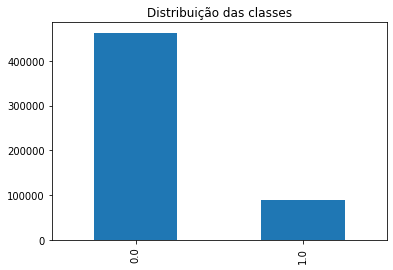

In [18]:
x_data = df.drop(["DIABETE3"],axis=1)
y_data = df["DIABETE3"]
y_data.value_counts().plot(kind = 'bar', title = 'Distribuição das classes')

In [19]:
import imblearn
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=3, n_neighbors_ver3=5)
x_data, y_data = undersample.fit_resample(x_data, y_data)

<AxesSubplot:title={'center':'Distribuição das classes'}>

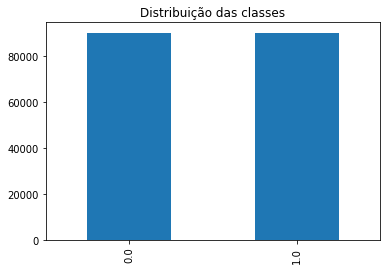

In [20]:
y_data.value_counts().plot(kind = 'bar', title = 'Distribuição das classes')

In [21]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=x_data.columns)

X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 123)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [23]:
model = Sequential()
model.add(Dense(60, activation="relu", input_shape=(len(x_data.columns),)))
model.add(Dense(60, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                1260      
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dense_2 (Dense)             (None, 3)                 183       
                                                                 
Total params: 5,103
Trainable params: 5,103
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
4515/4515 [==============================] - 25s 5ms/step - loss: 0.5694 - accuracy: 0.7006 - val_loss: 0.5394 - val_accuracy: 0.7205
Epoch 2/5
4515/4515 [==============================] - 23s 5ms/step - loss: 0.5355 - accuracy: 0.7216 - val_loss: 0.5297 - val_accuracy: 0.7261
Epoch 3/5
4515/4515 [=========

In [24]:
y_pred = model.predict(X_test)

1129/1129 [==============================] - 4s 4ms/step


In [25]:
predicted_categories = np.argmax(y_pred, axis = 1)
print(classification_report(y_test, predicted_categories, zero_division=0))

print("Class 0 predictions: ", np.count_nonzero(predicted_categories == 0))
print("Class 1 predictions: ", np.count_nonzero(predicted_categories == 1))

              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74     18050
         1.0       0.75      0.70      0.73     18068

    accuracy                           0.73     36118
   macro avg       0.73      0.73      0.73     36118
weighted avg       0.73      0.73      0.73     36118

Class 0 predictions:  19124
Class 1 predictions:  16994
